# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

****
## Preliminary Analysis

In [85]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


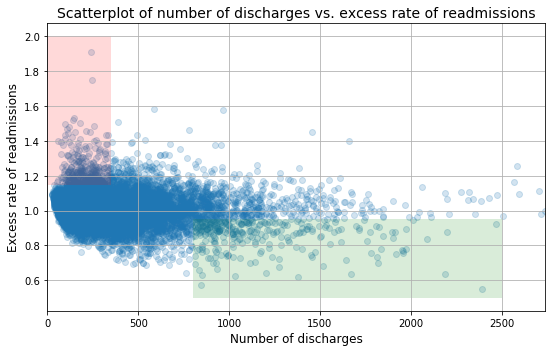

In [45]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

My initial thoughts in parantheses (  ).

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
    + (This doesn't seem to hold true. As number of discharges increases to 2500 the excess rate of readmissions holds around 0.6 - 1.0)
    + (Test for pearson's r correlation coefficient)
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 
    + (The problem with this figure above is that there is a block of points in the middle left portion of the figure that is one solid color. This doesn't tell us anything about point density. A hexplot may be more useful than scatterplot in this situation if we want to draw more conclusions about density.) 
    + (These points highlighted in the red and green sections may not representative of general trends)

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis and recommendations because it is not clear that there is indeed significant correlation between hospital capacity (number of discharges) and readmission rates. This conclusion cannot be drawn from the figure above. More statistical analysis is required to determine if there is a significant trend.
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
       + In this situation I would recommend testing the significance of the correlation coefficient.
       + Our null hypothesis in this case is that the correlation coefficient is NOT significantly different from zero, i.e. There IS NOT a significant linear relationship (correlation) between number of discharges and readmission rates. The alternative hypothesis is that there IS a significant linear relationship (correlation) between the two variables.
       
       
   2. Compute and report the observed significance value (or p-value).
       + Testing the null hypothesis above, we calculate a p-value for Pearson Correlation to be: 1.5e-23
       
       
   3. Report statistical significance for alpha = .01. 
      + The calculated p-value of 1.5e-23 is smaller than the alpha treshold of .01, suggesting a stastically significant result. Given this p-value, we reject the null hypothesis and accept the alternative hypothesis that there IS a significant linear relationship (correlation) between number of discharges and the excess rate of readmissions.
       
       
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
       + Statistical significance in this situation tells us that there is a correlation between number of discharages and excess rate of readmissions. However, the calculated Pearson correlation coefficient is -0.1, so the correlation is small. Given that this is a weak correlation, it is inappropriate to say that smaller hospitals are lacking the necessary resources to ensure quality care.
       
   
   5. Look at the scatterplot above. 
      - The advantage of a scatterplot is that we can easily see a general relationship between two variables. The disadvantage of a scatter plot is that occassionally we can have concentrations of data points that appear as a large block. The scatter plot in this case only tells us that there is a large amount of data in this region but not the density or the trend of the data. 
      - A hexplot can display the same information in a more informative way. See below.

You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [46]:
from scipy.stats import pearsonr
'''
Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. 
Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. 
Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 
Correlations of -1 or +1 imply an exact linear relationship. 
Positive correlations imply that as x increases, so does y. 
Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have
a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are 
not entirely reliable but are probably reasonable for datasets larger than 500 or so.

'''
r, p = pearsonr(x,y)
print('Pearson correlation coefficient, r: ', r)
print('p-value, p: ', p)

Pearson correlation coefficient, r:  -0.09309554287590441
p-value, p:  1.5022756426464526e-23


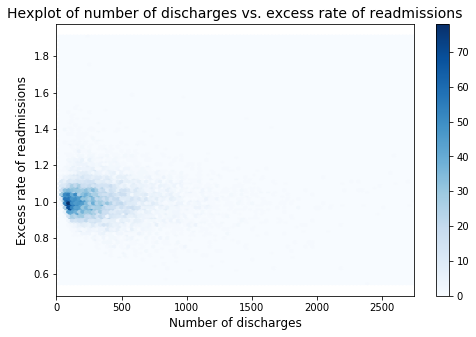

In [64]:
# generate a hexplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

plt.figure(figsize=(8,5))
plt.hexbin(x, y, cmap='Blues')
plt.colorbar()

plt.xlim([0, max(x)])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Hexplot of number of discharges vs. excess rate of readmissions', fontsize=14)

fig.tight_layout()

Additionally, let's confirm if the following statements are true:
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
    + Based on calculations below, only 59%, not 63%, of small hospitals/facilities have an excess readmission rate greater than 1
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [78]:
small_hospitals = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]
large_hospitals = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]
print('Mean Excess Readmission Rate for small hospitals (number of discharges <100): ', np.mean(small_hospitals['Excess Readmission Ratio']))
print('Percent of small hospitals that have excess readmission rate greater than 1: ', sum(small_hospitals['Excess Readmission Ratio'] > 1) / small_hospitals.shape[0])
print('Mean Excess Readmission Rate for large hospitals (number of discharges >1000): ', np.mean(large_hospitals['Excess Readmission Ratio']))
print('Percent of large hospitals that have excess readmission rate greater than 1: ', sum(large_hospitals['Excess Readmission Ratio'] > 1) / large_hospitals.shape[0])

Mean Excess Readmission Rate for small hospitals (number of discharges <100):  1.0226183501683506
Percent of small hospitals that have excess readmission rate greater than 1:  0.5918045705279747
Mean Excess Readmission Rate for large hospitals (number of discharges >1000):  0.9783354211663071
Percent of large hospitals that have excess readmission rate greater than 1:  0.4449244060475162


## Examining Measure Name

Another idea is to compare the Excess Readmission Rates for distinct 'measures'. Do certain 'measures' result in higher or lower Excess Readmission Rates?

In [94]:
clean_hospital_read_df['Measure Name'].value_counts()

READM-30-HF-HRRP          2841
READM-30-PN-HRRP          2799
READM-30-COPD-HRRP        2738
READM-30-AMI-HRRP         1807
READM-30-HIP-KNEE-HRRP    1393
Name: Measure Name, dtype: int64

In [103]:
hf = clean_hospital_read_df.loc[clean_hospital_read_df['Measure Name'] == 'READM-30-HF-HRRP']
pn = clean_hospital_read_df.loc[clean_hospital_read_df['Measure Name'] == 'READM-30-PN-HRRP']
copd = clean_hospital_read_df.loc[clean_hospital_read_df['Measure Name'] == 'READM-30-COPD-HRRP']
ami = clean_hospital_read_df.loc[clean_hospital_read_df['Measure Name'] == 'READM-30-AMI-HRRP']
hip_knee = clean_hospital_read_df.loc[clean_hospital_read_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP']

In [118]:
print('hf mean = ',np.mean(hf['Excess Readmission Ratio']))
print('pn mean = ',np.mean(pn['Excess Readmission Ratio']))
print('copd mean = ',np.mean(copd['Excess Readmission Ratio']))
print('ami mean = ',np.mean(ami['Excess Readmission Ratio']))
print('hip-knee = ',np.mean(hip_knee['Excess Readmission Ratio']))

hf mean =  1.003459830568306
pn mean =  1.0047852635353163
copd mean =  1.0042877521085438
ami mean =  1.007525886325269
hip-knee =  1.0277585703865788


The HF measure appears to have the lowest Excess Readmission Ratio whereas Hip-Knee has the highest Excess Readmission Ratio.  Let's test if they are statistically different through a z-test.

In [121]:
# Sample mean excess readmission ratio for hf: x_hf
x_hf = np.mean(hf['Excess Readmission Ratio']) 
# Sample mean excess readmission ratio for hip-knee: x_hn
x_hn = np.mean(hip_knee['Excess Readmission Ratio'])
# Sample standard deviation wind speed of single Forecast Category: s_single
s_hf = np.std(hf['Excess Readmission Ratio'])
# Sample standard deviation wind speed of all other Forecast Categories: s_others
s_hn = np.std(hip_knee['Excess Readmission Ratio'])
# Sample size of single Forecast Category: n_single
n_hf = len(hf['Excess Readmission Ratio'])
# Sample size of all other Forecast Categories: n_others
n_hn = len(hip_knee['Excess Readmission Ratio'])
# Compute Z score
z = (x_hf - x_hn) / np.sqrt((s_hf**2)/n_hf + (s_hn**2)/n_hn)
print(z)

-5.06663508435931


A z-score of -5.0666 suggests a statistically significant difference between the Excess Readmission Ratio of the HF measure as compared to the Hip-Knee measure. To reduce hospital readmissions, I would suggest examining the policies that have made the 'HF' measure successful with regard to low readmission rates, and try to apply that to the 'Hip-Knee' measure as well. I would also suggest bolstering infrastructure and resources for hospitals that are involved with the'Hip-Knee' measure, given that they have significantly higher hospital readmissions.